# Cartopy

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shapereader
import itertools
import cartopy

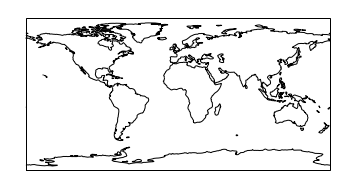

In [9]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(lw=0.1)

plt.show()

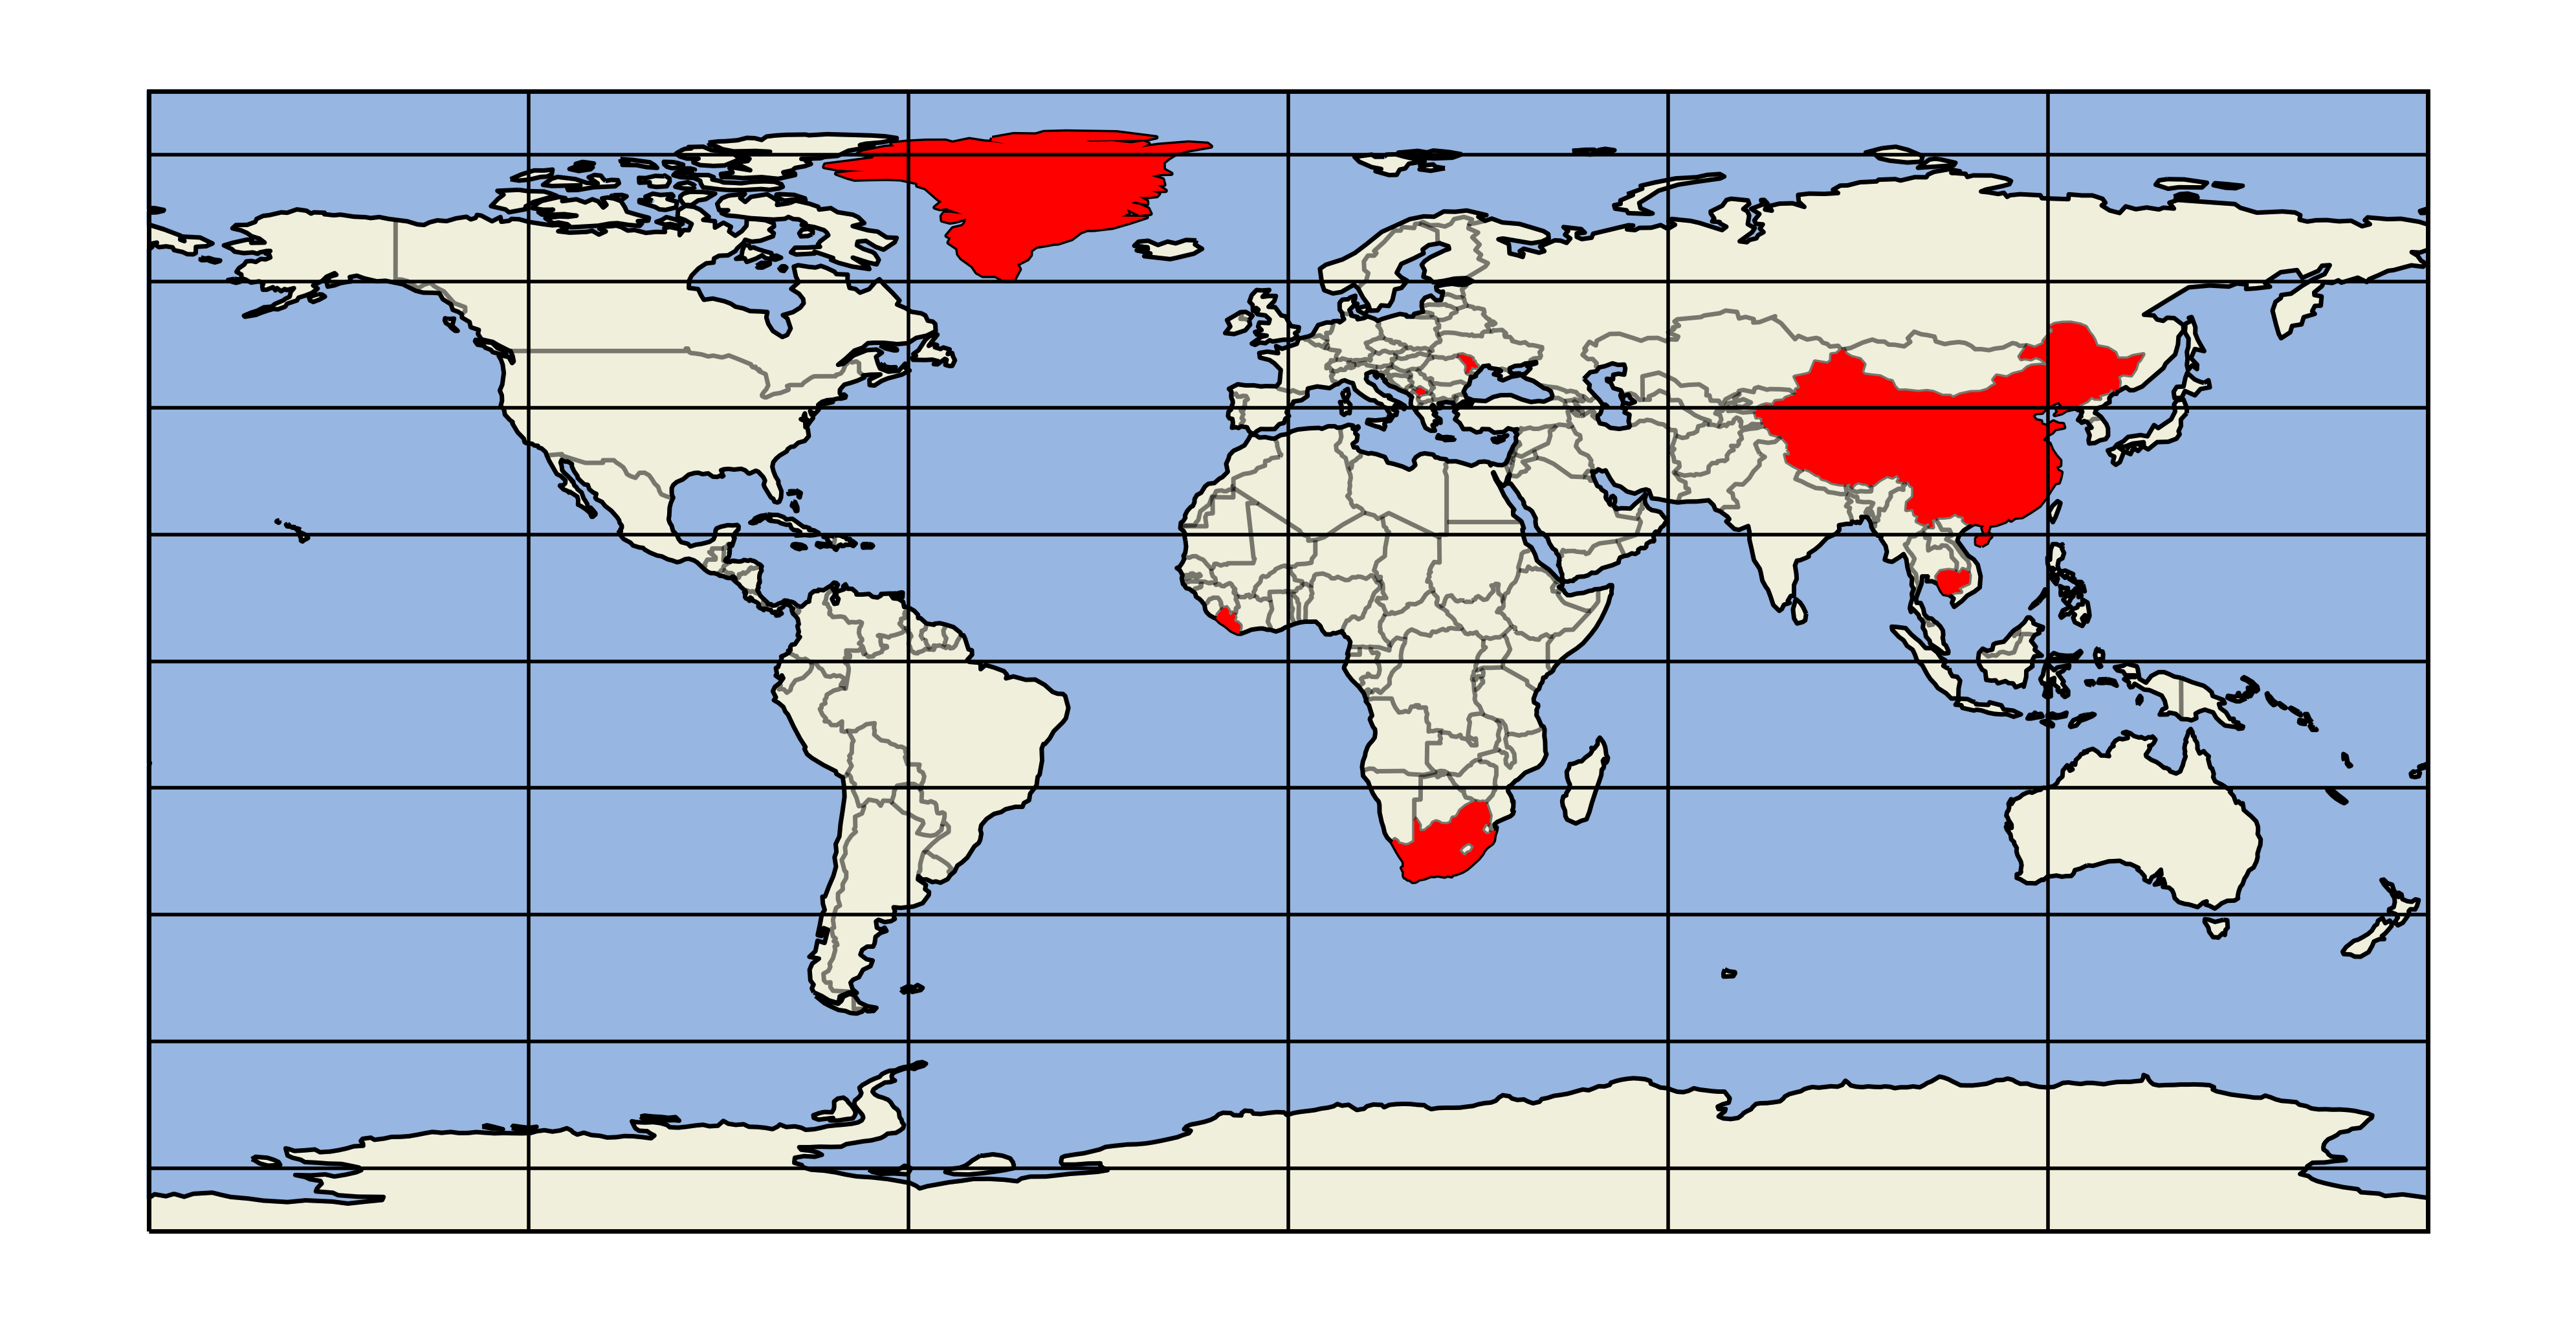

In [9]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

shpfilename = shapereader.natural_earth(resolution='110m',
                                        category='cultural',
                                        name='admin_0_countries')

plt.figure()

fig = plt.figure(figsize=(10,10),dpi=500)
ax1 = fig.add_subplot(1,1,1)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
cfeature.BORDERS
ax.coastlines(lw=0.5)
m = ax.gridlines(linestyle='-', color='black')

cant_list = ['Cambodia','Kosovo','Liberia','Moldova','China','South Africa','Greenland']

for i in cant_list:
    
    reader = shapereader.Reader(shpfilename)
    provinces = reader.records()
    countries = reader.records()

    country = filter(lambda province: province.attributes['ADMIN'] == i, provinces)
    for province in country:
        geometry = province.geometry
        ax.add_geometries(geometry, ccrs.PlateCarree(), facecolor='r')

plt.show()